# 붓꽃 데이터셋 분류

## 1.붓꽃 데이터셋 설명
- 데이터 크기 : 150개
- 클래스 : 3개의 품종
  - Setosa : 50개
  - Versicolor : 50개
  - Virginica : 50개
- 피처 : 4개
  - Sepal Length (cm): 꽃받침의 길이
  - Sepal Width (cm): 꽃받침의 너비
  - Petal Length (cm): 꽃잎의 길이
  - Petal Width (cm): 꽃잎의 너비

## 2.필요 라이브러리 임포트
- sklearn.tree.plot_tree : 결정 트리 모델을 시각화 하는데 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## 3.데이터 로드 및 확인

In [2]:
# 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# 데이터프레임으로 변환 (분석 및 시각화를 위해)
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

In [4]:
# 데이터셋 확인
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [5]:
# 데이터 내용 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# 데이터 통계량 확인
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 4.데이터 분할

In [7]:
# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 5.결정 트리 모델 학습

In [8]:
# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

## 6.예측

In [9]:
# 예측
y_pred = model.predict(X_test)
print(y_pred[:5])

[0 2 1 1 0]


## 7.성능 평가

In [10]:
# 성능 평가
# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9667


In [11]:
# 분류 보고서
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


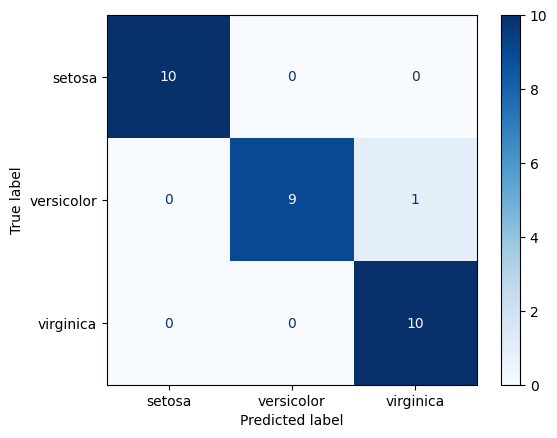

In [12]:
# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## 8.결정 트리 시각화

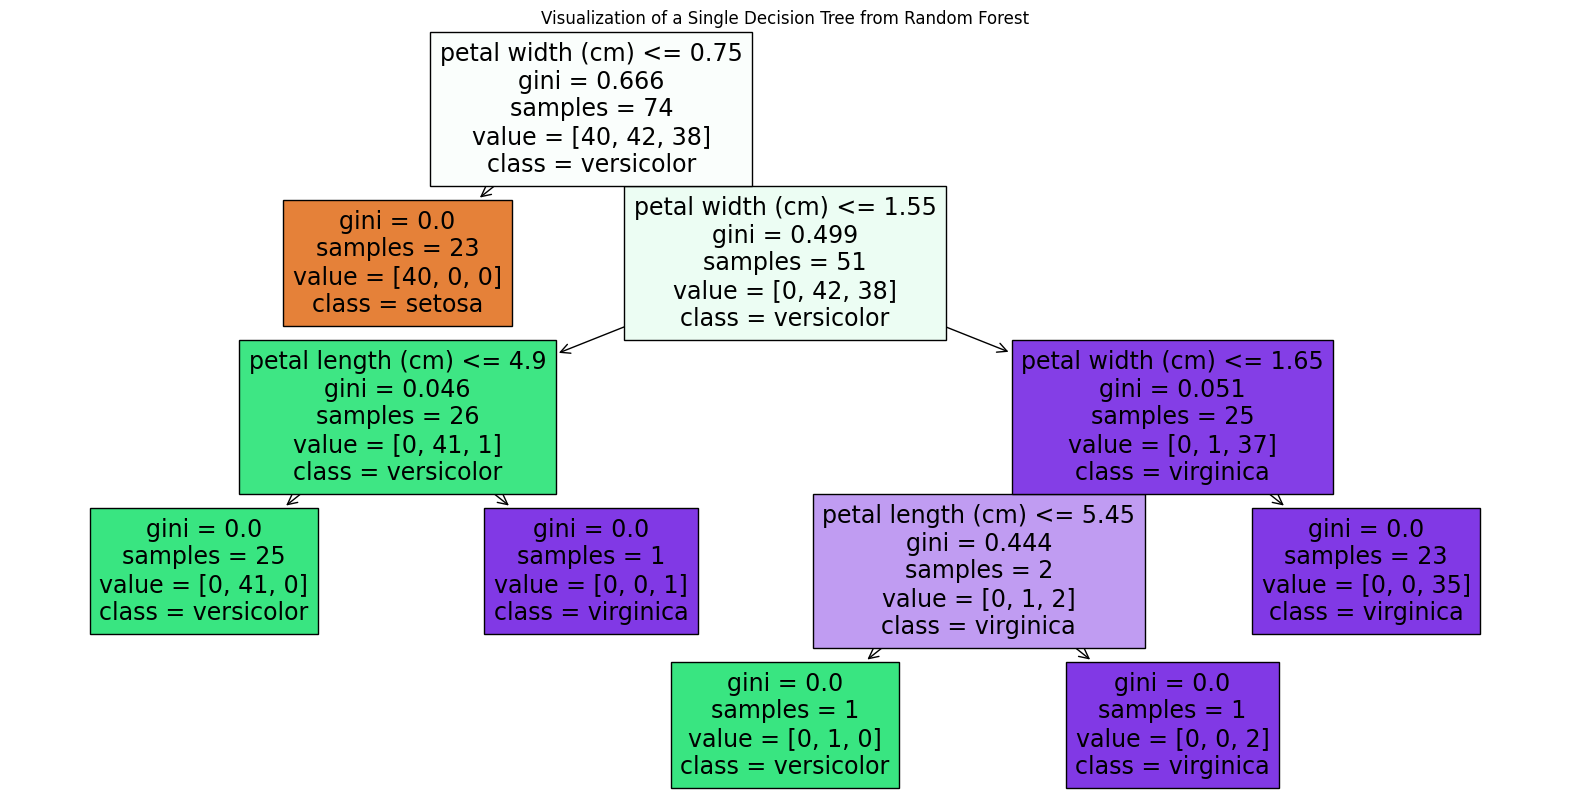

In [13]:
# 랜덤 포레스트의 개별 결정 트리 시각화
# RandomForestClassifier 모델에서 첫 번째 트리를 선택하여 시각화
estimator = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Visualization of a Single Decision Tree from Random Forest")
plt.show()

## 9.피처 중요도 확인

In [14]:
# 피처 중요도 계산 및 시각화
importances = model.feature_importances_
feature_names = iris.feature_names
print(importances)
print(feature_names)

[0.14325468 0.01123569 0.41214418 0.43336546]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
# 피처 중요도 출력
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

sepal length (cm): 0.1433
sepal width (cm): 0.0112
petal length (cm): 0.4121
petal width (cm): 0.4334


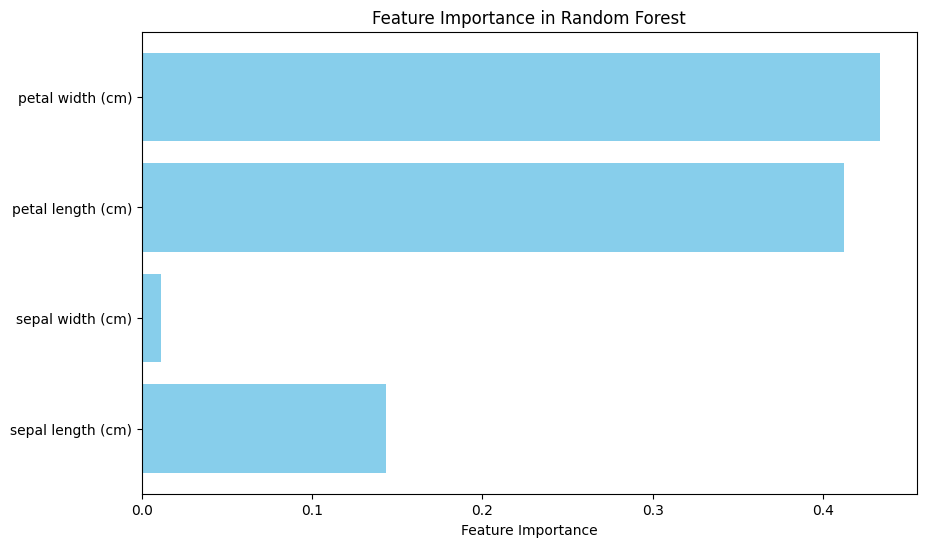

In [16]:
# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

## 10.추가적인 분석

## 1.Partial Dependence Plot(PDPs, 부분 종속 플롯)
- 특정 피처가 모델의 예측에 미치는 영향을 보여줌
- PDPs는 해당 피처가 고정되었을 때 모델의 예측이 어떻게 변화하는지 보여준다.

- `개별 그래프는 피처1개에 따른 클래스 예측 변화를 나타낸다.` 따라서 sepal length 피처에 따른 dependence 그래프를 보면 sepal length값이 증가할수록 해당 클래스 예측 값이 어떻게 변화하는지 보여주고 있다.

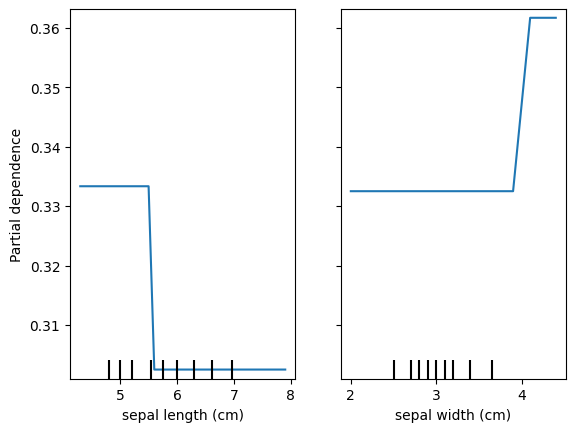

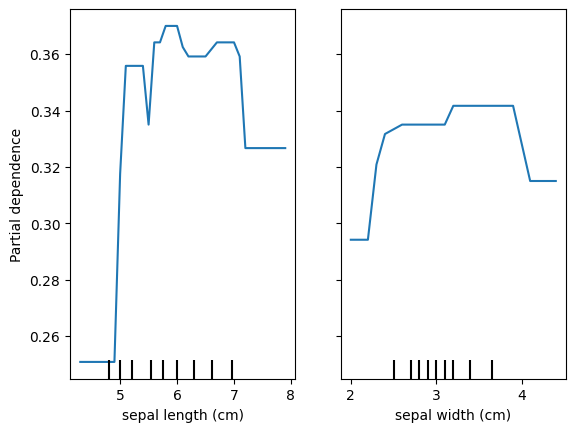

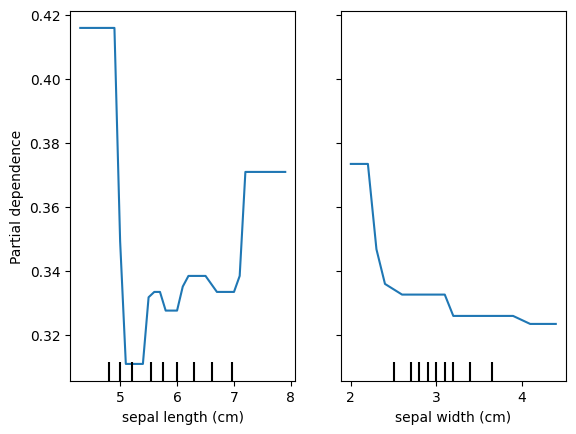

In [17]:
from sklearn.inspection import PartialDependenceDisplay

# 랜덤 포레스트 모델 학습 후 PDP 시각화
features = [0, 1]  # 피처 인덱스를 사용, 예를 들어 첫 번째와 두 번째 피처

# 특정 클래스를 위한 부분 종속 플롯을 생성합니다.
# 예를 들어 첫 번째 클래스 (클래스 인덱스 0) 에 대해 부분 종속 플롯을 생성하려면:
PartialDependenceDisplay.from_estimator(model, X_train, features, feature_names=iris.feature_names, grid_resolution=50, target=0)
plt.show()

# 두 번째 클래스 (클래스 인덱스 1)에 대한 부분 종속 플롯을 생성하려면:
PartialDependenceDisplay.from_estimator(model, X_train, features, feature_names=iris.feature_names, grid_resolution=50, target=1)
plt.show()

# 세 번째 클래스 (클래스 인덱스 2)에 대한 부분 종속 플롯을 생성하려면:
PartialDependenceDisplay.from_estimator(model, X_train, features, feature_names=iris.feature_names, grid_resolution=50, target=2)
plt.show()


## 2. Permutation Feature Importance (순열 중요도)
- 피처의 값을 임의로 섞어버린 후 모델의 성능이 얼마나 떨어지는지를 측정하여 피처의 중요도를 평가하는 방법.
- 이 방법은 모델이 실제로 그 피처에 의존하는 정도를 측정하는 데 유용하다.
- 피처 중요도를 좀 더 정확하게 평가하고자 할 때, 특히 피처 간의 상관관계가 있을 때 유용하다.
- 그래프의 x축은 순열 중여도로 특정 피처를 무작위로 섞었을 때 모델의 성능이 얼마만큼 떨어지는 나타난다. 즉 값이 클수록 모델 예측에 중요한 역할을 한다는 것으로 볼 수 있다.

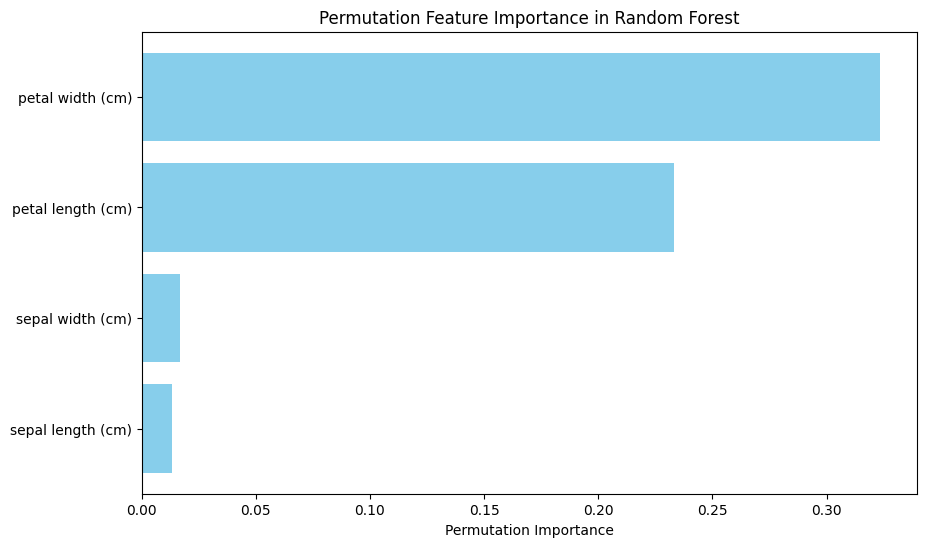

In [18]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(iris.feature_names, result.importances_mean[perm_sorted_idx], color='skyblue')
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance in Random Forest")
plt.show()


## 3. Out-of-Bag (OOB) Error Analysis
- 각 트리를 학습할 때 사용되지 않은 데이터(out-of-bag 데이터)를 사용하여 모델 성능을 평가할 수 있다.
- 이는 테스트 세트를 따로 분리하지 않고도 모델 성능을 평가할 수 있는 방법입니다.
- 데이터가 부족하여 테스트 세트를 분리하기 어려울 때 유용합니다.

In [19]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)
print(f"OOB Score: {model.oob_score_:.4f}")


OOB Score: 0.9417
